In [1]:
import pandas as pd
import numpy as np
import timeit
import datetime as dt
import matplotlib.pyplot as plt
#import plotly.graph_objs as go
%matplotlib inline

In [2]:
from pandas_datareader import data as pdr

C:\Users\reejung\anaconda3\envs\tf\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [3]:
date_end = dt.datetime.today()
date_start = date_end - dt.timedelta(30)

## Web scraping S&P100 companies from Wikipedia table

In [4]:
import requests
website_url = requests.get("https://en.wikipedia.org/wiki/S%26P_100").text

from bs4 import BeautifulSoup
soup = BeautifulSoup(website_url,'lxml')
print(soup.prettify())

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   S&amp;P 100 - Wikipedia
  </title>
  <script>
   document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"d714ef03-f19d-4244-bb15-a047308f9855","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"S\u0026P_100","wgTitle":"S\u0026P 100","wgCurRevisionId":959665002,"wgRevisionId":959665002,"wgArticleId":2658424,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Articles with short description","American stock market indices","S\u0026P Dow Jones Indices"],"wgPageContentLanguage":"en","wgPageContentModel":"wikitext"

In [5]:
wiki_table = soup.find('table',{'class':'wikitable sortable'})

In [6]:
data = []
tHeader = []
SP100_tickers = pd.DataFrame()

for tr in wiki_table.find_all("tr"):
    for th in tr.find_all("th")[:1]:
        tHeader = th.get_text(strip=True)
        SP100_tickers[tHeader] = []
    for td in tr.find_all("td")[:1]:
        data.append( td.get_text(strip=True))
        
SP100_tickers[tHeader] = data

In [7]:
SP100_tickers

,Symbol
0,AAPL
1,ABBV
2,ABT
3,ACN
4,ADBE
...,...
96,VZ
97,WBA
98,WFC
99,WMT


In [14]:
data[15:20]

['BKNG', 'BLK', 'BMY', 'BRK.B', 'C']

In [39]:
%%time

df = pd.DataFrame()

for i in data[:30]:
    symbol = SP100_tickers.loc[SP100_tickers['Symbol']==i]
    try:
        symbol_data = pdr.DataReader(i, 'yahoo', date_start, date_end).reset_index()
        #display(symbol_data)  
    except: 
        print(i + " - Err")
        symbol_data = pd.DataFrame()
        pass
    single_table = pd.concat([symbol, symbol_data], axis=0, ignore_index=False)
    single_table['Symbol'].ffill(inplace=True)
    df = df.append(single_table)
    

BRK.B - Err
Wall time: 20.8 s


In [40]:
df = df.loc[df['Date'].notnull()]

In [43]:
df = df.reset_index(drop=True)

df.groupby(['Symbol']).describe().transpose()

In [44]:
df = df.groupby(['Date', 'Symbol']).sum()

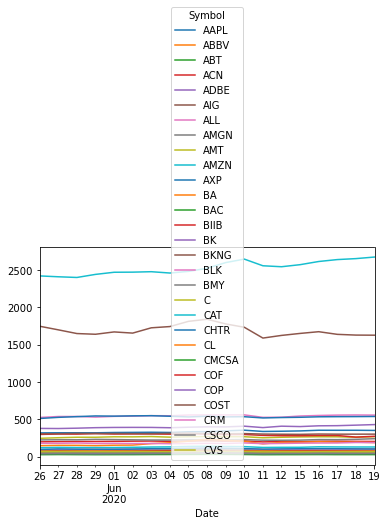

In [45]:
df['Close'].unstack().plot()